# 미세먼지 시계열 분석 - 중간 보고서

조원   
202004384 남능우  
201904208 백승민  
201904216 우도혁  
201904239 정찬영  

제목: 용인시 기흥구 공기질 예측

## 1. 프로젝트 개요

이번 분석은 용인시 기흥구의 공기질 데이터를 활용하여, 미세먼지(PM10) 농도의 변화를 시계열 관점에서 살펴보는 것을 목표로 한다.
산업화와 기후변화 등의 영향으로 공기 중 미세먼지 농도가 점차 증가하고 있는 가운데, 이러한 데이터를 바탕으로 농도의 추세를 시각화하고 향후 분석 방향을 수립하고자 한다.


## 2. 데이터 정보

데이터는 2024년 3월 1일부터 4월 28일까지의 용인시 기흥구 대기질 정보를 바탕으로 하였으며, AirKorea 웹사이트에서 수집되었다.

- **데이터 출처**: https://www.airkorea.or.kr
- **측정 항목**: PM10
- **수집 기간**: 2024년 3월 1일 ~ 2024년 4월 28일
- **파일 형식**: Excel


## 3. 분석 흐름 요약

### 🔹 데이터 전처리
- 엑셀 파일을 불러와 날짜 컬럼을 datetime 형식으로 변환
- 날짜를 인덱스로 설정하여 시계열 데이터로 활용

### 🔹 시각화
- PM10 농도의 일별 변화를 선 그래프로 표현
- 날짜를 기준으로 PM10 수치의 증감 여부를 시각적으로 확인 가능


## 4. 결과 예시

아래 그래프는 2024년 3~4월 사이 미세먼지(PM10) 농도의 변화를 보여준다. 특정 날짜를 중심으로 일시적인 증가 현상이 관측되며, 전반적인 변동 흐름을 확인할 수 있다.


## 5. 향후 계획

- 분석 기간을 확장하여 계절별, 연도별 비교 분석 수행
- Exponential (holt's 모형)
- naive 모형 이용한 예측


In [ ]:
# 데이터 수집의 한계로 2024/03/01  ~ 2024/04/28 데이터로 수집하였습니다.

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


file_path = '2024air.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d') # 날짜를 datetime으로 변환



In [ ]:
print(df.head())

            PM10  PM2.5     오 존   이산화질소  일산화탄소   아황산가스
날짜                                                    
2025-04-28    36     15  0.0418  0.0152   0.41  0.0022
2025-04-27    23      9  0.0491  0.0081   0.38  0.0017
2025-04-26    38     15  0.0396  0.0137   0.42  0.0020
2025-04-25    66     34  0.0340  0.0143   0.40  0.0014
2025-04-24    53     31  0.0443  0.0123   0.44  0.0016


여러가지 변수가 존재하지만 PM10은 거대 분진이라고 불리며 IQAir에서 대기오염 지표로 사용됩니다. PM10은 2014년 부터 우리나라에서도 미세먼지 예보 기준으로 사용되고 있습니다.  
출처 : https://www.google.com/search?q=PM10&oq=PM10&gs_lcrp=EgZjaHJvbWUyCQgAEEUYORiABDIHCAEQABiABDIHCAIQABiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDIHCAYQABiABDIHCAcQABiABDIHCAgQABiABDIHCAkQABiABNIBCTMxNTdqMGoxNagCCLACAfEFM0nF3DmmzZHxBTNJxdw5ps2R&sourceid=chrome&ie=UTF-8    
※따라서 PM10에 따른 시계열을 나타내어 분석

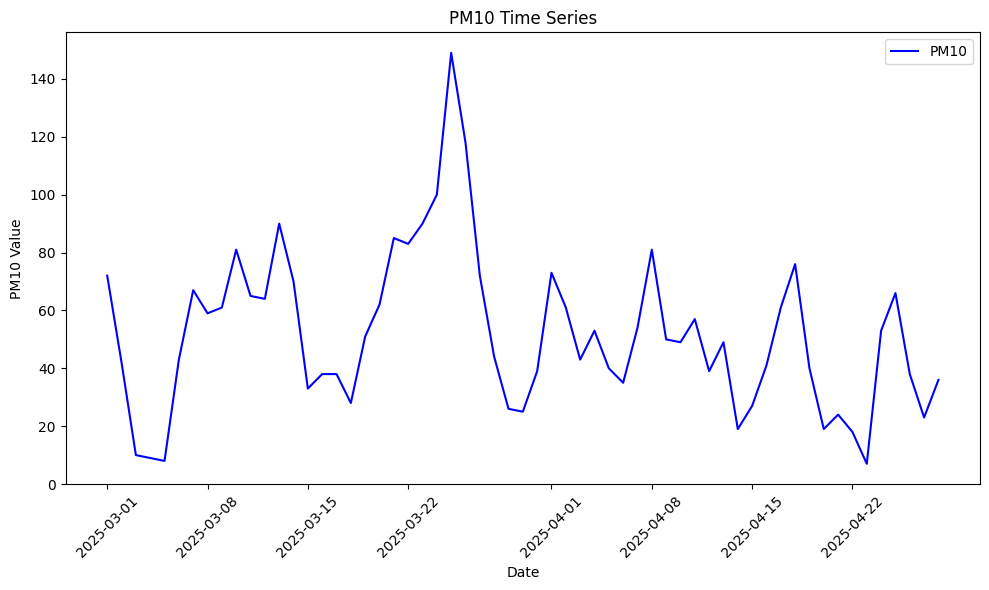

In [ ]:
# 날짜변수로 설정
df.set_index('날짜', inplace=True)

# PM10 시계열 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['PM10'], label='PM10', color='blue')
plt.title('PM10 Time Series')
plt.xlabel('Date')
plt.ylabel('PM10 Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


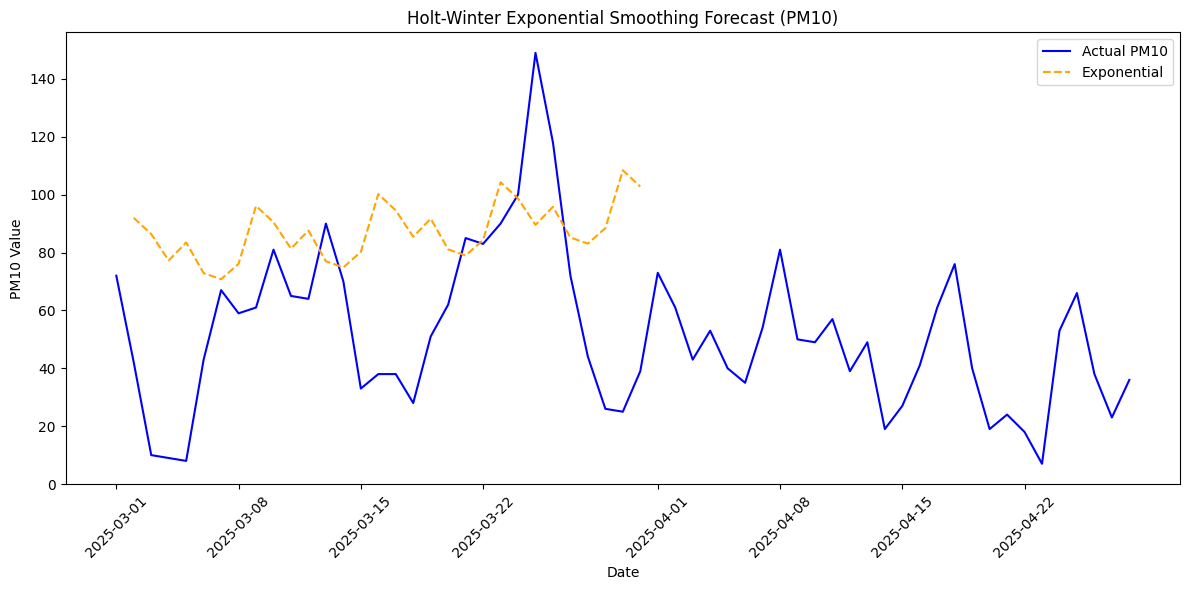

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# holt-winter's exponential smoothing
#  각 부분을 보면 trend는 가법, 계절성 가법을 주어 주기성은 7로 설정하여 나타내었다.
model = ExponentialSmoothing(df['PM10'], trend='add', seasonal='add', seasonal_periods=7)

#  30일 후 예측 설정
forecast = holt_winters_model.forecast(steps=30)

plt.figure(figsize=(12, 6))

# 실제 PM10 값 : 위의 시계열 데이터 그대로 갖고 왔습니다!
plt.plot(df.index, df['PM10'], label='Actual PM10', color='blue')

# 예측된 PM10 값 : Exponential Smoothing Forecast (Holt's Winter 모형을 적용하여 미래치 예측한 결과를 보여주고 있습니다.)
forecast_index = pd.date_range(df.index[-1], periods=31, freq='D')[1:] # 다음 31 일치 예측!
plt.plot(forecast_index, forecast, label='Exponential', color='orange', linestyle='dashed')

plt.title('Holt-Winter Exponential Smoothing Forecast (PM10)')
plt.xlabel('Date')
plt.ylabel('PM10 Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install u8darts


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00
  Created wheel for pyod: filename=pyod-2.0.4-py3-none-any.whl size=200479 sha256=e3ebf5a74b8ef60264195400d6757e29e2e9f006e77a28572213f0ad3e77af31
  Stored in directory: /root/.cache/pip/wheels/cb/54/28/d02f62720600bc815c41219efedd0cb86889737

In [ ]:
!pip install pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

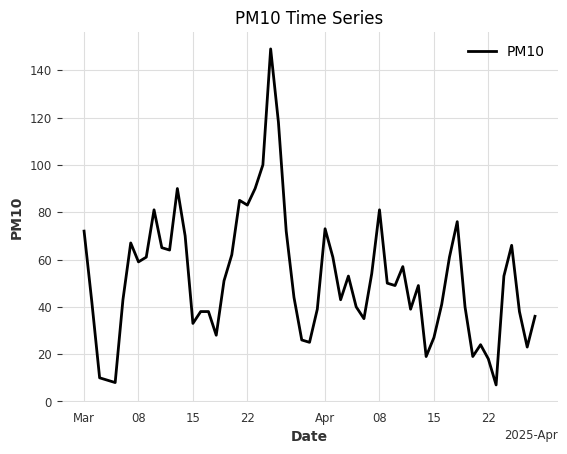

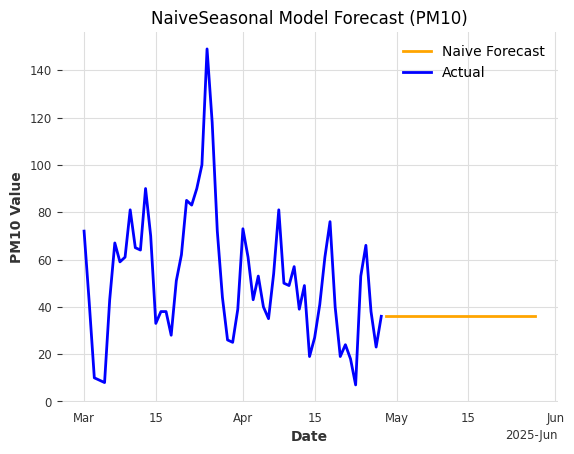

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import NaiveSeasonal


# PM10 데이터를 TimeSeries로 변환
series = TimeSeries.from_dataframe(df, value_cols=['PM10'])

# 시계열 데이터 시각화
series.plot()
plt.title('PM10 Time Series')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.show()

# NaiveSeasonal 모델 생성
model = NaiveSeasonal(K=1)  # Randomwalk 모형과 유사
model.fit(series)

# 예측 (다음 30일 예측)
forecast = model.predict(n=30)

# 예측된 값을 시각화
forecast.plot(label='Naive Forecast', color='orange')
series.plot(label='Actual', color='blue')

plt.title('NaiveSeasonal Model Forecast (PM10)')
plt.xlabel('Date')
plt.ylabel('PM10 Value')
plt.legend()
plt.show()



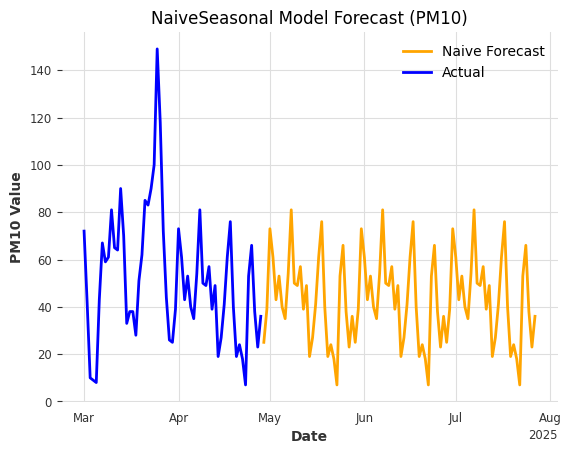

In [ ]:
# k= 30으로 마지막 30일 시점 값을 3번 반복하여 미래시점 90일을 예측하였습니다.
# NaiveSeasonal 모델 생성
seasonal_model = NaiveSeasonal(K=30)  # Randomwalk 모형과 유사
seasonal_model.fit(series)

# 예측 (90일 예측)
forecast = seasonal_model.predict(n=90)

# 예측된 값을 시각화
forecast.plot(label='Naive Forecast', color='orange')
series.plot(label='Actual', color='blue')

plt.title('NaiveSeasonal Model Forecast (PM10)')
plt.xlabel('Date')
plt.ylabel('PM10 Value')
plt.legend()
plt.show()


향후보고 :   
1) ARIMA, Prohet등 같은 추가적 시계열 모델 적용  
2) 기존 모델과 성능을 비교하여 더 높은 정확도의 모델을 찾을 예정이다.  
3) 종합결론 및 정책적 시사점 도출 : 미세먼지가 가장 높을 예상시기에 따른 대응방안까지 연결지어 설명할 것이다.